# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Откроем файлы с данными и изучим общую информацию. 

In [1]:
import pandas as pd
from IPython.display import display
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats as st
import seaborn as sns
data = pd.read_csv('/datasets/games.csv')
display(data)
data.head(60)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Шаг 2. Подготовим данные для анализа

### Заменим названия столбцов (приведем к нижнему регистру)

In [2]:
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [3]:
#data.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       #'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], axis = 'columns', inplace=True)
data.columns = data.columns.str.lower()
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы

Преобразуем столбец year_of_release в формат даты.

In [4]:

data['year_of_release'] = data['year_of_release'].astype('Int64')
#data['year_of_release'] = data['year_of_release'].dt.year
display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Обработаем пропуски там где это необходимо

проверим данные на наличие пропусков, вызовом метода .isna(), посчитаем в каждом столбце пропуски методом .sum()

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

заполним пропуски в столбце year_of_release медианным значением, сгрупировав данные по одинаковым названиям игр. 

In [6]:
#median_year = data.groupby('name')['year_of_release'].median().to_dict()
#def year_add(row):
    #if pd.isna(row['year_of_release']):
        #return median_year[row['name']]
    #return row['year_of_release']
#data['year_of_release'] = data.apply(year_add, axis=1)
#data.isna().sum()

In [7]:
#median_year2 = data.groupby('platform')['year_of_release'].median().to_dict()

#def year_add2(row):
    #if pd.isna(row['year_of_release']):
        #return median_year2[row['platform']]
    #return row['year_of_release']
#data['year_of_release'] = data.apply(year_add2, axis=1)
#data['year_of_release'] = data['year_of_release'].apply(np.ceil)
#data.isna().sum()

Заменим пропуски в столбце name значением "other", а пропущенные значения в столбце genre значением "unknown"

In [8]:
data['name'] = data['name'].fillna(value = 'other')
data['genre'] = data['genre'].fillna(value = 'unknown')
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим в каком столбце с рейтингом есть значение "tbd"

In [9]:
display(len(data.loc[data['critic_score']=='tbd']))
display(len(data.loc[data['user_score']=='tbd']))

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

2424

В столбце user_score есть значение "tbd" - To Be Determined (будет пределено). Значит на момент составления таблицы данных не было известно значение рейтинга. Изменим эти значения на NAN, применив to_numeric с аргументом errors='coerce', который заменит tbd.

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

заполним пропуски в столбце user_score значением, сгрупировав данные по одинаковым названиям игр. 

In [11]:
#data_user_score = data.set_index('name')['user_score'].to_dict()
 
#def user_score_add(row):
    #if pd.isna(row['user_score']):
        #return data_user_score[row['name']]
    #return row['user_score']
 
#data['user_score'] = data.apply(user_score_add, axis=1)
#display(data)
#data.isna().sum()

заполним пропуски в столбце rating значением, сгрупировав данные по одинаковым названиям игр. 

In [12]:

data_rating = data.set_index('name')['rating'].to_dict()
 
def rating_add(row):
    if pd.isna(row['rating']):
        return data_rating[row['name']]
    return row['rating']
 
data['rating'] = data.apply(rating_add, axis=1)
#display(data)
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6567
dtype: int64

заполним пропуски в столбце critic_score значением, сгрупировав данные по одинаковым названиям игр. 

In [13]:
#data_critic_score = data.set_index('name')['critic_score'].to_dict()
 
#def critic_score_add(row):
    #if pd.isna(row['critic_score']):
        #return data_rating[row['name']]
    #return row['critic_score']
 
#data['critic_score'] = data.apply(critic_score_add, axis=1)
#display(data)
#data.isna().sum()

In [14]:
#display(data)

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [16]:
data_pivot_name = data.pivot_table(index="year_of_release", values="name", aggfunc='count') \
                  .reset_index()

display(data_pivot_name)

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


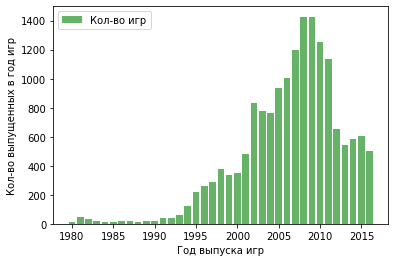

In [17]:
plt.bar(data_pivot_name['year_of_release'], data_pivot_name['name'], width=0.8, alpha=0.6, color = 'g', label='Кол-во игр')

plt.ylabel('Кол-во выпущенных в год игр')
plt.xlabel('Год выпуска игр')
plt.legend()
plt.show()

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Построим сводную таблицу, сгрупировав данные по платформам и посчитав суммарные продажи для каждой.

In [18]:
data_pivot_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                  .reset_index()

data_pivot_platform = data_pivot_platform.sort_values(by = 'total_sales', ascending=False)
display(data_pivot_platform)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


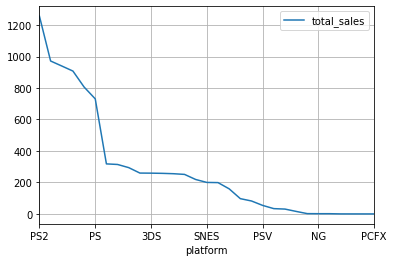

In [19]:
data_pivot_platform.plot(x='platform', y='total_sales', grid=True) 

Просмотрев таблицу и график можно выделить платформы с наибольшими продажами примерно от 300млн. Выберем платформы с наибольшими суммарными продажами. Оставим для рассмотрения только 9 платформ, так как график резко меняется примерно на этом значении

In [20]:
data_platform_top9 = data_pivot_platform.head(9)
list_platform  = list(data_platform_top9['platform'])
print(list_platform)


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP']


построем распределение продаж по годам для платформ с наибольшими продажами. Рассмотрим только период с 2002 года, так как с этого года увеличивается кол-во выпускаемых игр

In [21]:
data_cut = data
data_cut = data_cut.loc[data_cut['platform'].isin(list_platform)]
data_cut = data_cut.loc[data_cut['year_of_release'] >= 2002]
#display(data_cut)
data_pivot_platform = data_cut.reset_index().pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

#data_pivot_platform = data_pivot_platform.reset_index()
#data_pivot_platform.columns = ['platform_sales', 'platform_count']
#display(data_pivot_platform)


Text(0, 0.5, 'кол-в проданных игр')

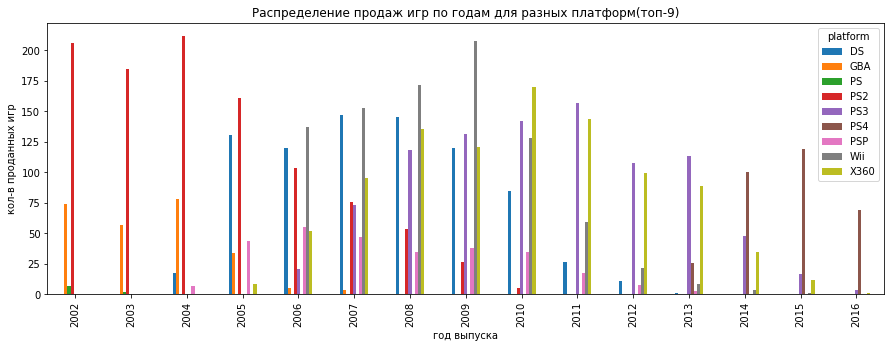

In [22]:
data_pivot_platform.plot.bar(figsize=(15, 5))
plt.title('Распределение продаж игр по годам для разных платформ(топ-9)')
plt.xlabel('год выпуска')
plt.ylabel('кол-в проданных игр')


Text(0, 0.5, 'кол-в проданных игр')

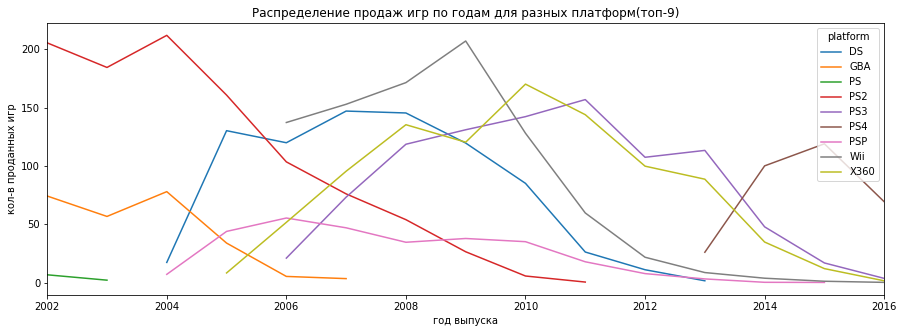

In [23]:
data_pivot_platform.plot(figsize=(15, 5))
plt.title('Распределение продаж игр по годам для разных платформ(топ-9)')
plt.xlabel('год выпуска')
plt.ylabel('кол-в проданных игр')


По графикам можно предположить что среднее количество лет за которые появляются новые и исчезают старые платформы около 10 лет. Посчитаем средний срок "жизни" платформы вычтем из наибольшего года наименьший. И найдем среднее значение для всех средних по платформам.

In [24]:
year_platform = data_cut.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
#year_platform=year_platform.reset_index()
year_platform.columns = ['min_year', 'max_year']
year_platform['mean_year'] = year_platform['max_year'] - year_platform['min_year']

display(year_platform)

,min_year,max_year,mean_year
platform,,,
DS,2004,2013,9
GBA,2002,2007,5
PS,2002,2003,1
PS2,2002,2011,9
PS3,2006,2016,10
PS4,2013,2016,3
PSP,2004,2015,11
Wii,2006,2016,10
X360,2005,2016,11


In [25]:
mean_year = year_platform['mean_year'].mean()

print(math.ceil(mean_year))

8


Средний срок "жизни" платформ примерно 8 лет.

#### Возьмем данные за соответствующий актуальный период.

Так как средний срок "жизни" платформ примерно 8 лет, сделаем срез данных по половине периода жизни платформ, 4 года, так как этот период учтет и рост и падение платформ.
будем в даьнейшем рассматривать этот срез для анализа.

In [26]:
data_actual = data.query('year_of_release >= 2012')
display(data_actual)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

построем распределение продаж по годам для платформ, используя данные актуального периода.

In [27]:
data_platform_top = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                  .reset_index()

data_platform_top = data_platform_top.sort_values(by = 'total_sales', ascending=False)
display(data_platform_top)

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


In [28]:
data_platform = data_actual.reset_index().pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

#display(data_platform)

Text(0, 0.5, 'кол-в проданных игр')

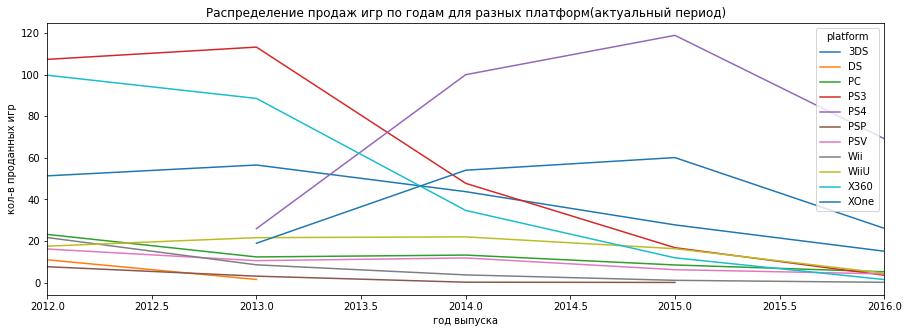

In [29]:
data_platform.plot(figsize=(15, 5))
plt.title('Распределение продаж игр по годам для разных платформ(актуальный период)')
plt.xlabel('год выпуска')
plt.ylabel('кол-в проданных игр')

По графику видно, что есть платформы, у которых продажи в начале рассматриваемого периода были большие, но под конец рассматриваемого периода они стали приближаться к 0. Отберем следующие платформы как потенциально выгодные: PS4, PS3, XOne, 3DS, X360	

#### Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Создадим таблицу потенциально выгодных платформ с продажами

In [30]:
plt_top4 = ['PS4', 'PS3', 'XOne', '3DS', 'X360']

(-1, 2.5)

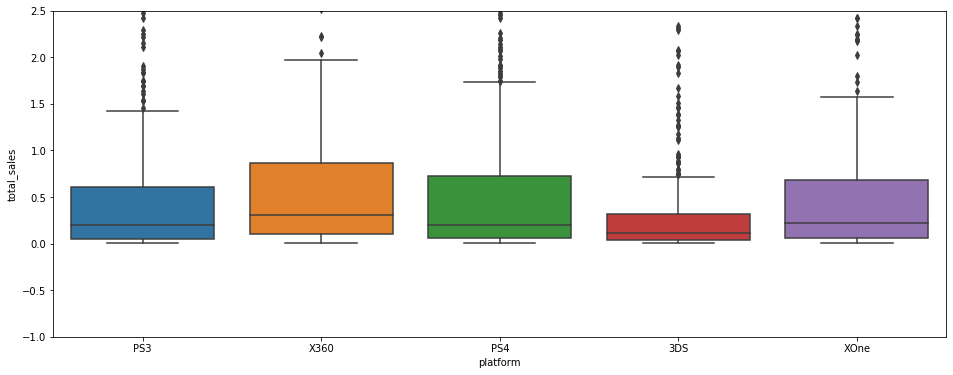

In [31]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='platform', y='total_sales', data = data_actual.query('platform in @plt_top4'), orient='v')
plt.ylim(-1, 2.5)

<font color='purple'>
По графику видно что по основным продажам игр для платформ X360, PS3, PS4 и XOne данные одинаковы. У платформы PS3 немного ниже значения продаж, чем у остальных. Меньше всего из рассматриваемых платформ продаж у платформы 3DS. Больше всего продаж для платформы X360
</font>


#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Расчитаем корреляцию и построим диаграмму рассеяния для платформы PS4. Выбрала эту платформу так она одна из последних выпущенных платформ с наибольшими продажами.

In [32]:
data_actual['critic_score'] = pd.to_numeric(data_actual['critic_score'], errors='coerce').astype('float64')
data_actual_ps4 = data_actual[(data_actual['platform'] == 'PS4')]


#data_actual.info()
print('Коэффициент корреляции между продажами и оценкой критиков:', data_actual_ps4['total_sales'].corr(data_actual_ps4['critic_score']))
print('Коэффициент корреляции между продажами и оценкой пользователей:', data_actual_ps4['total_sales'].corr(data_actual_ps4['user_score']))

Коэффициент корреляции между продажами и оценкой критиков: 0.406567902061781
Коэффициент корреляции между продажами и оценкой пользователей: -0.031957110204556424


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Для платформы PS4 зависимость между продажами и оценкой критиков больше, чем между продажами и оценкой пользователей. Построим диаграммы рассеяния.

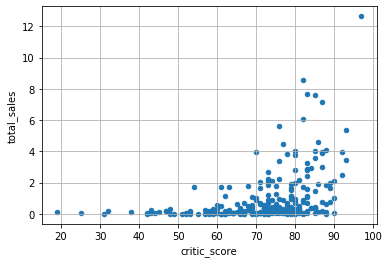

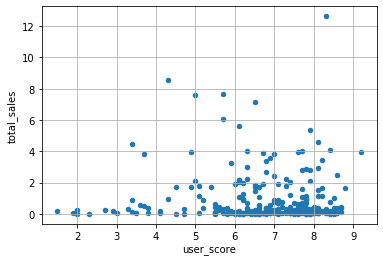

In [33]:
data_actual_ps4.plot(x="critic_score", y="total_sales", kind='scatter', grid=True)
data_actual_ps4.plot(x="user_score", y="total_sales", kind='scatter', grid=True)

Из полученных диаграмм так же можно сделать вывод, что зависимость между количеством проданных копий игр и оценкой критиков больше, чем между кол-вом проданными копий и оценкой пользователей.

#### Соотнесем выводы с продажами игр на других платформах.

Рассмотрим корреляцию и графики рассеяния для всех актуальных платформ одновременно.

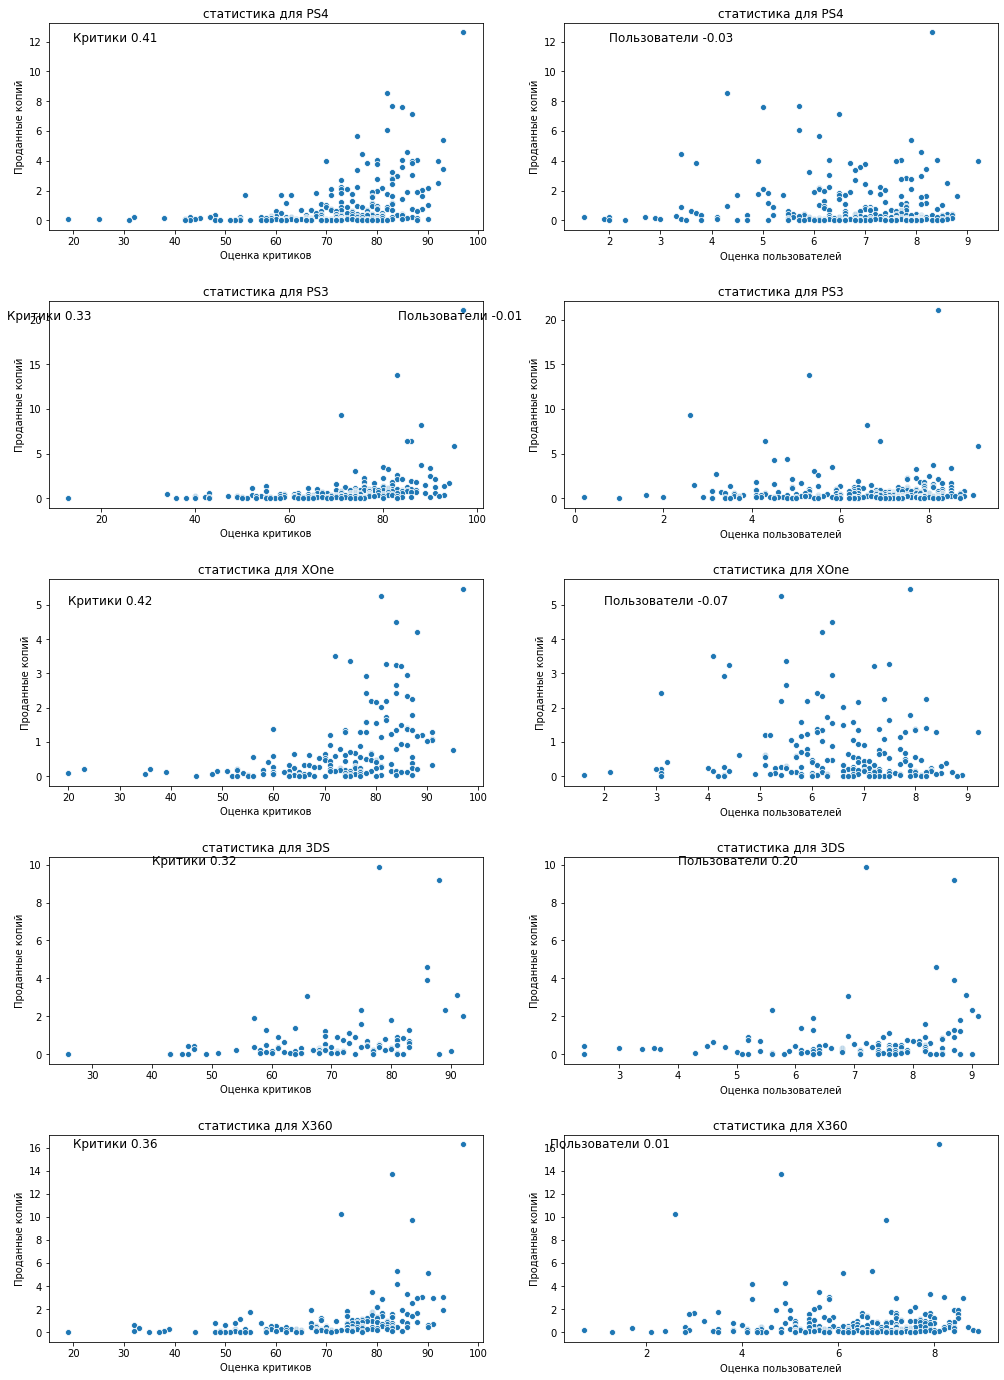

In [34]:
data_actual_plt = data_actual.query('platform in @plt_top4')
#display(data_actual_plt)

fig, axes = plt.subplots(nrows=(len(plt_top4)), ncols=2, figsize=(15,20))
fig.tight_layout(pad=5.0)


for i in range (len(plt_top4)): 
    score_df = data_actual_plt.loc[data_actual_plt['platform'] == plt_top4[i]]
    
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    sns.scatterplot(data=score_df, x="critic_score", y="total_sales", ax = ax1)
    sns.scatterplot(data=score_df, x="user_score", y="total_sales", ax = ax2)
    ax1.set_title('статистика для '+ plt_top4[i])
    ax1.set_xlabel('Оценка критиков')
    ax1.set_ylabel('Проданные копий')
    ax2.set_title('статистика для '+ plt_top4[i])
    ax2.set_xlabel('Оценка пользователей')
    ax2.set_ylabel('Проданные копий')
    crit_corr =  score_df["total_sales"].corr(score_df['critic_score'])
    user_corr =  score_df["total_sales"].corr(score_df['user_score'])
    ax1.text(
        ax1.get_xticks(minor=False).min()+ax1.get_xticks(minor=False).min(),
        ax1.get_yticks(minor=False).max() -ax1.get_yticks(minor=False)[2],
        "Критики {:.2f}".format(crit_corr), fontsize=12)
    ax2.text(
        ax2.get_xticks(minor=False).min()+ax2.get_xticks(minor=False).min(),
        ax2.get_yticks(minor=False).max() -ax2.get_yticks(minor=False)[2],
        "Пользователи {:.2f}".format(user_corr), fontsize=12)

Для всех рассматриваемых платформ зависимость между кол-вом проданных копий игр и оценкой критиков больше, чем между продажами и оценкой пользователей. зависимость между продажами и оценкой пользователей совсем небольшая. Корреляция по оценкам критиков приблизительно одинаковая для всех платформ, а вот для оценок пользователей отличается не только значением, но и направлением, для платформ PS4, PS3 и Xone корреляция обратная, то есть с ростом продаж падает оценка пользователя.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [35]:
data_genre = data_actual.reset_index().pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()
data_genre = data_genre.sort_values(by = 'total_sales', ascending=False)
display(data_genre)

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


По таблице можно предполоить, что продажи игр зависят от жанра игры. Самые продаваемые игры с жанрами Action, Shooter и Sports. Меньше всего продаж для жанров Strategy	 и Puzzle.

 ## Шаг4: Составим портрет пользователя каждого региона

 ### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [36]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
for i in range (len(sales)):
    data_sales = data_actual.reset_index().pivot_table(index='platform', values=sales[i], aggfunc='sum').reset_index()
    data_sales_top5 = data_sales.sort_values(by = sales[i], ascending=False).head(5)
    data_sales_top5 = data_sales_top5.reset_index()
    display(data_sales_top5)


,index,platform,na_sales
0,9,X360,140.05
1,4,PS4,108.74
2,3,PS3,103.38
3,10,XOne,93.12
4,0,3DS,55.31


,index,platform,eu_sales
0,4,PS4,141.09
1,3,PS3,106.86
2,9,X360,74.52
3,10,XOne,51.59
4,0,3DS,42.64


,index,platform,jp_sales
0,0,3DS,87.79
1,3,PS3,35.29
2,6,PSV,21.04
3,4,PS4,15.96
4,8,WiiU,13.01


<font color='purple'>
У пользователей Северной Америки и Европы популярностью пользуются платформы PS3, PS4, X360. Пользователи Северной Америки и Европы приобрели примерно одинаковое количество игр по выбранным платформам.
Продажи в Японии меньше, чем в остальных регионах.
</font>

 ### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5). Поясните разницу.

In [37]:
for i in range (len(sales)):
    data_genre = data_actual.reset_index().pivot_table(index='genre', values=sales[i], aggfunc='sum').reset_index()
    data_genre_top5 = data_genre.sort_values(by = sales[i], ascending=False).head(5)
    display(data_genre_top5)

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


<font color='purple'>
Самые популярные жанры игр у пользователей Северной Америки и Европы Action, Shooter, Sports, Misc и Role-Playing. Продажи по этим жанрам чуть больше в Северной Америке, чем в Европе. Самый популярный жанр игр в Японии - Role-Playing, это можно объяснить тем, что большинство игр данного жанра было разработано в Японии.
</font>

 ### Определим для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [38]:
#data_actual.isna().sum()

<font color='purple'>
В столбце rating много пропусков, заменим эти пропуски значением unk (неизвестно), для того чтобы учитывать продажи игр без рейтинга
</font>

In [39]:
data_actual['rating'] = data_actual['rating'].fillna(value = 'unk')
pd.set_option('mode.chained_assignment', None)
#data_actual.isna().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
for i in range (len(sales)):
    data_esrb = data_actual.reset_index().pivot_table(index='rating', values=sales[i], aggfunc='sum').reset_index()
    data_esrb_top5 = data_esrb.sort_values(by = sales[i], ascending=False).head(5)
    display(data_esrb_top5)

,rating,na_sales
2,M,237.17
0,E,115.16
4,unk,93.81
1,E10+,77.14
3,T,67.69


,rating,eu_sales
2,M,201.01
0,E,113.55
4,unk,79.45
1,E10+,57.27
3,T,55.54


,rating,jp_sales
4,unk,107.44
0,E,28.43
3,T,26.58
2,M,21.87
1,E10+,8.26


<font color='purple'>
Самые продаваемые игры в Северной Америке и Европе игры с рейтингом E, T, M (для всех, для подростков, для взрослых). Так же в выборку из пяти рейтингов с самыми большими продажами для всех регионов попал рейтинг с неизвестным значением. В Японии наибольшие продажи по неизвестному рейтингу, можно предположить что в Японии от рейтинга esrb нет зависимости по продажам, хотя в топ-5 попали популяные рейтинги для других регионов.
Общий вывод можно сделать следующий: от рейтинга esrb зависят продажи в Северной Америке и Европе.
</font>

 ## Шаг5: Проверим гипотезы

 ### Гипотеза1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Посчитаем средние пользовательские рейтинги для платформ Xbox One и PC.

In [41]:
data_user_score_xone = data_actual.query('platform == "XOne"')
print('Средний пользовательский рейтинг платформы Xbox One: {:.2f}'.format(data_user_score_xone['user_score'].mean()))

#data_user_score_xone.isna().sum()
#data_user_score_xone.info()

Средний пользовательский рейтинг платформы Xbox One: 6.52


In [42]:
data_user_score_pc = data_actual.query('platform == "PC"')
print('Средний пользовательский рейтинг платформы PC: {:.2f}'.format(data_user_score_pc['user_score'].mean()))
#data_user_score_pc.isna().sum()
#data_user_score_pc.info()

Средний пользовательский рейтинг платформы PC: 6.43


Приблизительно средние пользовательские рейтинги равны. Но чтобы понять, различаются ли средние рейтинги в зависимости от платформы, недостаточно просто их сравнить. Без проведения корректного теста нельзя считать рейтинги одинаковыми.
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяют метод scipy.stats.ttest_ind (array1, array2, equal_var).
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Поэтому H₀: средний пользовательский рейтинг для платформ одинаковый. Альтернативная гипотеза H₁: средний пользовательский рейтинг для платформ различый.

Удалим пропущенные значения в столбце user_score для дальнейших расчетов.

In [43]:
data_user_score_pc.dropna(subset = ['user_score'], inplace = True)
data_user_score_xone.dropna(subset = ['user_score'], inplace = True)


Воспользуемся статистическим тестом Барлетта, для того чтобы понять считать ли равными дисперсии двух выборок. Тест Барлетта выбрала так как посчитанные средние в выборках примерно одинаковые.

In [44]:
from scipy.stats import bartlett
xone_score = list(data_user_score_xone['user_score'])
pc_score = list(data_user_score_pc['user_score'])
stat, p = bartlett(xone_score, pc_score)
p

0.01021139458323661

Получившееся p-значение предполагает, что совокупности имеют одинаковые дисперсии. Посчитаем дисперсии для выборок.

In [45]:
[np.var(x, ddof=1) for x in [xone_score, pc_score]]

[1.9069968429360695, 2.770443997158418]

In [46]:
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(
    xone_score, 
    pc_score, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вывод: Полученное значение p-value говорит о том, что вероятность того, что средние пользовательские рейтинги для платформ XOne и PC могут быть одинаковые. 

 ### Гипотеза2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [47]:
data_genre_score_action = data_actual.query('genre == "Action"')
print('Средний пользовательский рейтинг для жанра Action: {:.2f}'.format(data_genre_score_action['user_score'].mean()))
#data_genre_score_action.isna().sum()
#data_genre_score_action.info()

Средний пользовательский рейтинг для жанра Action: 6.83


In [48]:
data_genre_score_sports = data_actual.query('genre == "Sports"')
print('Средний пользовательский рейтинг для жанра Sports: {:.2f}'.format(data_genre_score_sports['user_score'].mean()))
#data_genre_score_sports.isna().sum()
#data_genre_score_sports.info()

Средний пользовательский рейтинг для жанра Sports: 5.46


Удалим пропущенные значения в столбце user_score для дальнейших расчетов.

In [49]:
data_genre_score_action.dropna(subset = ['user_score'], inplace = True)
data_genre_score_sports.dropna(subset = ['user_score'], inplace = True)

Приблизительно средние пользовательские рейтинги равны. Но чтобы понять, различаются ли средние рейтинги в зависимости от жанра, недостаточно просто их сравнить. Без проведения корректного теста нельзя считать рейтинги одинаковыми.
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяют метод scipy.stats.ttest_ind (array1, array2, equal_var). 
H₀: средний пользовательский рейтинг для жанров Action и Sports одинаковый. Альтернативная гипотеза H₁: средний пользовательский рейтинг для жанров Action и Sports различый.

In [50]:
action_score = list(data_genre_score_action['user_score'])
sports_score = list(data_genre_score_sports['user_score'])
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(
    action_score, 
    sports_score, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод: Полученное значение p-value говорит о том, что вероятность того, что средние пользовательские рейтинги для жанров action и sports равны очень мала. средние пользовательские рейтинги для жанров action и sports различаются.

 ## Шаг6: Общие выводы

<font color='purple'>
Проанализировав предоставленные данные можно сделать следующие выводы о параметрах, которые влияют на успешность продаж игр:
Примечание: Выводы были сделаны на основе данных за последние 4 года, данное значение было выбрано в результате анализа и расчета приблизительного половиного срока "жизни" для платформ (так как этот период учтет и рост и падение платформ).

 
1. Успешность игры у пользователей зависит от жанра игры. При этом необходимо учитывать регион продаж, например, для пользователей Северной Америки и Японии популярные жанры различаются.
2. При анализе продаж игр следует обратить внимание на рейтинги критиков по платформам. Наблюдается зависимость между проданными играми и рейтингом критиков.

Общие выводы анализа данных:
- За последние 4 года самыми популярными платформами можно назвать платформы 'PS4', 'PS3', 'XOne', '3DS', 'X360'.
- Самые популярные платформы за весь период 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP'
- Самые большие продажи игр за последние 4 года в Северной Америке, самые меньшие в Японии (сравнивались регионы - Северная Америка, Европа и Япония).

Портрет пользователей в зависимости от региона:
- У пользователей Северной Америки и Европы популярностью пользуются платформы PS3, PS4, X360. Пользователи Северной Америки приобрели больше игр для перечисленных платформ, чем пользователи Европы. Общие продажи в Японии в зависимости от платформы меньше чем в остальных регионах.
- Самые популярные жанры игр у пользователей Северной Америки и Европы Action, Shooter, Sports, Misc и Role-Playing. Продажи по этим жанрам больше в Северной Америке. Самый популярный жанр игр в Японии - Role-Playing, это можно объяснить тем, что большинство игр данного жанра было разработано в Японии.
- От рейтинга esrb зависят продажи в регионах. Самые продаваемые игры с рейтингом E, T, M (для всех, для подростков, для взрослых).
 </font>